## Fake News Data Set 


## Library

In [40]:
import re 
import nltk 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics 

[nltk_data] Downloading package punkt to C:\Users\NIKHIL
[nltk_data]     ANAND\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing Data 

In [3]:
df  = pd.read_csv(r'C:\Users\NIKHIL ANAND\Desktop\ML_DC\NLP\Course_1\fake_or_real_news.csv')

## Data viewing

In [4]:
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


## Data Information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [6]:
title =  df['title']
text =  df['text']

## Generating Word Cloud of all title's

413534


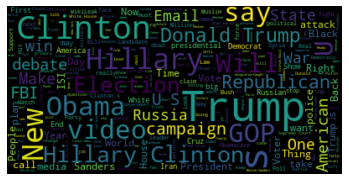

In [33]:
title_combine =  ""
for item in title:
   title_combine =  title_combine + item

# print(title_combine)
print(len(title_combine))
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="black").generate(title_combine)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

## Generating Word cloud of all News Text

In [ ]:
# text_combine =  ""
# for item in text:
#     text_combine =  text_combine + item

# print(title_combine)
# print(len(title_combine))
# print(len(text_combine))

## Viweing Info of fake and real news 

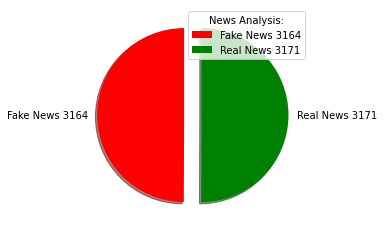

In [38]:
import matplotlib.pyplot as plt
fake_news  =  df[df['label']== "FAKE"]
real_news =  df[df['label'] == "REAL"]
mylabels = ["Fake News 3164", "Real News 3171"]
myexplode = [0.2, 0]
mycolors = ["Red", "Green"]
plt.pie([len(fake_news), len(real_news)], labels = mylabels, colors = mycolors, startangle = 90,  explode = myexplode,  shadow = True)
plt.legend(title = "News Analysis:")
plt.show()

In [41]:
train, test = train_test_split(df, test_size = 0.2)
train.columns.values
train.head()

Unnamed: 0                                              title  \
2563        6912         ACLU Threatens War Against President Trump   
5365        9149  Mainstream Presidential Polls Fuel Illusion Th...   
1690        8356  WATCH As Chris Cuomo Tells Rudy Giuliani: You ...   
4776        4143  Obama hits the road to push new programs, win ...   
2559         323  2nd New York prison worker charged in killers'...   

                                                   text label  
2563    ACLU Threatens War Against President Trump  ...  FAKE  
5365  Mainstream Presidential Polls Fuel Illusion Th...  FAKE  
1690  WATCH As Chris Cuomo Tells Rudy Giuliani: You ...  FAKE  
4776  President Obama hit the road Wednesday to prom...  REAL  
2559  Plattsburgh, New York (CNN) Gene Palmer, the s...  REAL

In [43]:
def refineWords(s):
    letters_only = re.sub("[^a-zA-Z]", " ", s) 
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    print( " ".join( meaningful_words ))
    return( " ".join( meaningful_words ))

train["title"] = train["title"].apply(refineWords)
train["text"] = train["text"].apply(refineWords)

train_two = train.copy()
train.head()


aclu threatens war president trump
mainstream presidential polls fuel illusion voters stuck two choices
watch chris cuomo tells rudy giuliani live fact free trumpland
obama hits road push new programs win support tax plan
nd new york prison worker charged killers escape
biden latest signal run president
lynch delayed confirmation vote
children executed isis crimes include refusal fast report says
reasons starting world war middle east really bad idea
speaker pressure signs pointing reluctant paul ryan
donald trump challenge anti muslim questioner
america loneliest country world abandoned traditional family structure
russia called war party bluff
set staff horrified hillary caught brutal interview
gop avoids showdown epa climate change rules
obama endorse candidate democratic primary race
jeb bush invokes mlk unveils education plan
iraqi forces civilians flee isis gains control ramadi us official says
nsa program reportedly helped us gather evidence north korea sony hack
steve pieczenik

syrian war report november russian attack helicopters swarm homs province vineyard saker
obama senseless murders church shooting
australia hunt anti vax nurses prosecute disobeying medical police state
election open thread
veterans help veterans cope ptsd decorated marine new york based nonprofit headstrong project
terrible week trump sticks style substance wisconsin
real donald trump please stand
surprise trump might accept election results never accepted democratic norms
donald trump collapse caused one big factor hillary clinton
texas police arrest trump voter wearing deplorable shirt
hillary clinton apologizes e mail system take responsibility
va secretary apologizes misstating military service homeless veteran
race replace boehner expected another leadership vs conservative caucus showdown
going wikileaks
ers hail release u prisoners held iran republicans slam obama policy
trump caught ripping kids charity time
bundy brother acquittal trolled hilarious way craigslist
pakistan poli

putin congratulates trump says russia ready restore relations us
astonishing chart shows moderate republicans endangered species
carson threatens leave republican party
federal court nsa phone record collection excessive
campaign chaos donald trump shows management style
fifth clinton presidency hill
jesse matthew charged hannah graham slaying
huffpollster growing economy good news obama
defense secretary carter endorses year timeline obama anti isis plan backs criticism
american middle class really
comment award winning american journalist exposes true origin isis war terror hillary clinton ties isis supporters osmanisnin
security expert fear churches targeted
time magazine reaches new low sexist investigate hillary clinton
utter cock barrier success
donald trump questions clinton health rally ohio think easy
report russian u jets close encounter syria
obama try allay gulf nation leaders fears iran
fine give gop four years liberal case either bernie sanders electing republican preside

obama outlines plan keep troops afghanistan
comes opposition book clinton allies prepare trump
republicans come boehner speaker list
poll back renewal nsa data collection
finally get work
freakout obamacare ruling could unlike anything seen
notice anything different msm lately
ww nuclear war drills world war start ukraine
thousands march mourn slain boris nemtsov
even fox news outraged boehner netanyahu plan undermine obama
wsj report black rapists baylor strictly white guys covered
twenty years dictatorial democracy information
scott walker wall canadian border worth reviewing
clinton add michelle obama cabinet
podesta part wikileaks releases another emails total
fact check trump right clinton might cause ww
mitt romney donald trump phony fraud
stumbles trump seeks avert damaging loss wisconsin
facebook faces high profile lawsuit regarding facial recognition technology deepface
even gawker haters fear strategy peter thiel using destroy gawker
empire files inside palestine refugee camp

watch tonight republican debate
russian oven millet pumpkin porridge
christie lost republicans election may losing election
oregon standoff america double standards race religion
drudge koch soros bezos non politicians determine next president
new pew report significant economic impact illegals anchor babies
paris migrant campers increase calais shut
sanders calls trump political coward voter suppression report
fewer immigrants entering u illegally changed border security debate
donald trump threatens jail hillary clinton second presidential debate
year conventional political wisdom turned upside
hillary clinton v donald trump
discrimination condemnation australia war boat people
ice spends millions flying illegal immigrant children across us
google god
vowing end two wars obama may leave three behind
footage shows suspects brussels attack
bill black liberals listen immense cost ignoring tom frank warnings
fbi orlando suspect u citizen vowed allegiance islamic state
aristocracy immunit

former gop representative calls armed insurrection video
social media blackout fbi emails trending twitter facebook buzzfeed snapchat
memo trump action day
booze brands polarize like politicians
yemen fits iran plans mideast rule beyond
comment due process dead staggering inmates america never received trial raymond karczewski
comment science overwhelming point wifi industry appeals brain tumor association ordinance science overwhelming point wifi industry appeals brain tumor association ordinanc waking science
open letter mr khizr khan
deutsche bank considering alternatives paying cash bonus
teachable moment saudi arabia economic threat united states
rise mandatory vaccinations means end medical freedom
believe myth weightlifting slow
democrats hand obama stinging defeat trade deal
canada posts perfect tweet immigration website crashes
democrats weigh nudge sanders
us climate change leader obama new plan measures
newsthump declared enemy people
tom delonge changing cynical views youth

ore gunman asked victims christians
marco rubio strategy utterly baffling
philadelphia prison guards arrested alleged assault handcuffed inmate
bald faced lies final republican debate
revelation unleashed unlocking mysteries bible mysterious book
critics islam time face facts mr president
year old artifact ultimate evidence ancient astronaut technology
even exxonmobil says climate change real gop
defense board white house blocked navy china sea warship passages
fed holds raising rates fears rising dollar
congressional leaders pushing debt limit plan ahead speaker vote
wife muslim jihadist killed wounded orlando nightclub massacre says knew nothing
dem convention speeches day reality check team vets claims
satellite images show catastrophic destruction boko haram attack nigeria
account
mexico invite donald trump visit video
north dakota police arrest pipeline protesters
funny republicans upset facebook column
rand paul flatlining
truth enemy state
trump raises concern members urban comm

divides america weekend chicago street
marco rubio critics immigration bill right
cosmic story scorpio new moon october
homeland security chief says furloughed department shuts
cruz crushes trump wyoming republican caucus
wikileaks bombshell chelsea clinton used foundation charity money lavish wedding life truthfeed
workplace injuries adding income inequality
us election campaign reveals mass alienation two party system
big asia trade deal obama wants beast
newt says gop women actually thanking calling megyn kelly sex obsession
global relief effort underway nepal earthquake leaves dead thousands injured
republicans take full control congress
russell brand back trews got quite bit say u elections video
purchasing loyalty foreign aid
editorial presidential stakes high nuclear arsenal boston globe
hillary clinton demands answers democrats call foul
europeans future putin migrant crisis video
altruistic others woman nearly lost life car crash attempts find
trump draws fire gop leaders atta

exclusive lawsuits disputes taxes tied trump companies
clinton campaign stiff arms reporter coverage pool
political polarization paralyzes us boston globe
russia extends aleppo ceasefire friday urges rebels leave
stop vendetta planned parenthood
iran best outcome keep negotiating without reaching deal
full ackbar right warns obama war plan trap
ex military intel officer says white house delaying announcement bergdahl desertion charge
poll trump gains iowa still dominates new hampshire
polls tighten trump gains percent poll average two weeks
hillary one suffers memory loss look bill
case clinton defiant amid email probe
house gop faces test budget priorities
state fired pastor demands sermons notes
george soros begins color revolution america moveon activists march trump
clinton camp desperate russia trains wwiii
us election elaborate john lewis christmas campaign soon
obamacare enrollees anxiously await supreme court decision threatens coverage
reward hillary clinton white house breaki

insiders rubio wins kasich bombs
republicans troubled clinton donors see conflict dark money
cnn got complete list questions trump interview dnc
early primary calendar set change
rise alt right
mitt romney fans speculation another white house run
hillary accepts nomination bold speech singular moment american history
wikileaks clintons purchase million maldives estate
hillary win google win everything
poll clinton lead trump slips florida shooting
close call russia u near miss problem moves syrian air space
rick rule
turkey russia headed military face
ready aftermath election election
important concepts manosphere taught
former ambassador andrew young calls end water fluoridation civil rights issue
things watch tonight debate
nuclear reactor norway leaks radioactive iodine
david fry released jail
little brother ultimate authority jeb bush cheated america helped deliver presidency w
barack obama delay suspend election hillary forced new fbi email investigation
another black swan hits u 

british pm refuses withdraw support saudi arabia
everything need know polarized politics palm hand
wikileaks releases nd batch clinton campaign chair podesta emails
wolf richter layoffs alphabet access hit google fiber pause plans ceo leaves alphabet cracks costs
political correctness yuengling brewery opioid epidemic
reckons might legit iphone charger
israel votes netanyahu last ditch vow base dead peace process video
russian warships ready strike terrorists near aleppo
project veritas robert creamer illegal foreign wire transfer caught tape
gop candidates jockey position final debate dash
one election thread ehhh
clinton close sanders ready give
steve case voting hillary clinton
rebels escalate attacks western aleppo killing civilians
gop debate round expect another wild night
underestimate bernie sanders
awkward arranged marriage trump pence
iranians every right take us embassy veterans today
oligarchy prepared groundwork stealing election
obama trade bill trouble
senate advances bi

islamic state accepts boko haram allegiance pledge
abby martin exposes hillary clinton chair john podesta
trump world women always objects
detained raids belgium
donald trump million ukraine connection
eric trump charity spent k family owned golf resorts
james bond make grade modern mi says britain top spy
gop power rankings kasich gets boost
whose side russia syria
clinton foundation continue accept foreign money hillary run
new wikileak top clinton operative believes black voters stupid truthfeed
times obama administration lied president position sex marriage
vegan custard stuffed pumpkin recipe
donald trump destroying jeb bush gambit could last straw
isis uses suicide dogs restrain iraqi army advance mosul
clinton enters fall key advantages white house race
syria assad says receives info us led coalition anti isis strikes
obama fragile climate legacy
someone telling truth freddie gray death
jeffrey sewell et al metabiology face face artificial intelligence video
cuba releases politi

expect new congress
skype sex scam fortune built shame
hillary clinton maintains swing state leads comey email letter flops
gop take back white house
fly zone help people aleppo
true believer donald trump choice religious right
trump says cruz canadian birth could precarious gop
members congress took trip secretly funded foreign government
democrats push prevent gun sales terror list suspects
iran talks extended another day
partisan polarization abortion
first take wacko bird take flight gop
something reilly trusts even less iran
former dea prescription head drops bombshell congress protects big pharma fuels opioid crisis
freedom rider organizing age hillary
senators seek living wage capitol hill contractors
dems scary electoral future progressive sales pitch getting harder
began dml spot prediction race
evil hillary supporters yell f ck trump burn truck daddy fishing yr son trump bumper stickers video percentfedup com
astonishing chart shows moderate republicans endangered species
wik

<ipython-input-43-7e947484180a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["title"] = train["title"].apply(refineWords)


god white evangelical christianity obsessed policing sex particular context though good evangelicals try reframe clearly hypocritical rankings sin insisting god hates sin truth evangelicals believe god primarily appalled non normative sexual appetites specifically god hates gay sex though god may love gay people god loves heterosexual marriage though god continue forgive numerous divorces remarriages long ultimately end good christian straight marriage stay celibate options many people level moral regulation sounds downright bizarre mention damn near impossible achieve anything like unholy retrograde thinking causes complicated relationship church reject altogether belief systems driven fear fear god wrath fear end days fear divine retribution thing moral quibbles kim davis belief system legal quibbles fear misguided thinking cause one believe upholding person basic civil rights amounts condoning choices moral panics happen around issues sexual regulation society believes even mass mur

wide ranging discussion trump also said disapproved russian president vladimir putin actions eastern ukraine called renegotiation paris climate accord said would dismantle dodd frank financial regulations elected president presumptive republican nominee declined share details plans deal north korea meeting kim would mark major shift u policy towards isolated nation would speak would problem speaking trump said kim time would put lot pressure china economically tremendous power china said half hour interview trump tower office manhattan china pyongyang major diplomatic economic supporter trump said united states treated unfairly paris climate accord prescribes reductions carbon emissions countries renegotiation pact would major setback hailed first truly global climate accord committing rich poor nations reining rise greenhouse gas emissions blamed warming planet turning economy trump said planned release detailed policy platform two weeks said would dismantle nearly dodd frank package 

gloat progressives candidate going win mandate millions enraged people dislike agenda values sure trump proved mean spirited ultimately ineffective political vessel forces aroused outlive could get stronger future respect trump may reprise role played another intemperate figure late senator barry goldwater like trump goldwater openly spurned political consensus opposing everything civil rights medicare tente defeat led huge losses congressional level could indeed occur year well goldwater might failed defeat augur second new deal including president lyndon johnson may hoped instead campaign set stage something right wing resurgence defined american politics election president obama pushing deep south gop goldwater created southern strategy helped elect richard nixon followed victory goldwater acolyte ronald reagan history could repeat fall disaster people wrote gop soon became victims hubris believing could extend welfare state federal government without limits turned without broad pop

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



randy maugans jeffrey sewell metabiology face face artificial intelligence published sep speaking subject vital humanity comprehend ai artificial intelligence objective disclose influencing humanity subtle subtle ways without knowledge existence comprehension prevalence humanity easily led sophisticated technological control mechanisms jeffrey sewell spent many years deep study biology process introduces us metabiology tenants simple holds true nucleus cell furthest reaches distant galaxies life begets life miraculous pattern reflected cosmos super organism earth us divine vessel human body website http cytocosmos com metabiology study invisible systems life spanning subatomic celestial using cell biology template able map elements within cell elements unseen systems latter elements obtained cross referencing multiple sources material obe lbl nde experiencer community called astral systems map quite nicely systems cell tell narrative albeit complexity sophistication cellular earth many

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



mutually beneficial campaign detente donald trump sen ted cruz tex came end debate stage thursday two republican presidential candidates locked tight race win feb iowa caucuses argued whether cruz meets constitutional requirements serve president whether trump trustworthy conservative tainted cruz called new york values far battle broke sixth gop debate campaign season sen marco rubio fla intensely personal clashes cruz new jersey gov chris christie rubio christie hoping emerge crowded republican field establishment champion forces insurgency trump cruz represent recently trump cruz interest avoid direct confrontation cruz leery alienating trump supporters might come incendiary billionaire self destruct trump part consider cruz much threat thursday went far question fitness govern trump contended cruz birth u citizen canada might disqualify becoming president constitution decrees natural born citizen may hold office big question mark head party really trump told cruz senator texas reto

<ipython-input-43-7e947484180a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["text"] = train["text"].apply(refineWords)


Unnamed: 0                                              title  \
2563        6912                 aclu threatens war president trump   
5365        9149  mainstream presidential polls fuel illusion vo...   
1690        8356  watch chris cuomo tells rudy giuliani live fac...   
4776        4143  obama hits road push new programs win support ...   
2559         323   nd new york prison worker charged killers escape   

                                                   text label  
2563  aclu threatens war president trump aclu messag...  FAKE  
5365  mainstream presidential polls fuel illusion vo...  FAKE  
1690  watch chris cuomo tells rudy giuliani live fac...  FAKE  
4776  president obama hit road wednesday promote gra...  REAL  
2559  plattsburgh new york cnn gene palmer second pr...  REAL

In [45]:
XTrain = train['text']
YTrain = train['label']

XTrain.head() 

2563    aclu threatens war president trump aclu messag...
5365    mainstream presidential polls fuel illusion vo...
1690    watch chris cuomo tells rudy giuliani live fac...
4776    president obama hit road wednesday promote gra...
2559    plattsburgh new york cnn gene palmer second pr...
Name: text, dtype: object

In [47]:
YTrain.head()

2563    FAKE
5365    FAKE
1690    FAKE
4776    REAL
2559    REAL
Name: label, dtype: object

In [49]:
vectorizer = CountVectorizer().fit(XTrain)
XTrain_vectorized = vectorizer.transform(XTrain)

print('Vocabulary len:', len(vectorizer.get_feature_names()))
print('Longest word:', max(vectorizer.vocabulary_, key=len))


Vocabulary len: 59597
Longest word: globalsuperemploymentvacanciesreportsworld


In [51]:
transformer = TfidfTransformer(smooth_idf = False)
tfidf = transformer.fit_transform(XTrain_vectorized)
model = MultinomialNB(alpha=0.1)
model.fit(XTrain_vectorized, YTrain)

MultinomialNB(alpha=0.1)

In [52]:
XTest = test['text']
YTest = test['label']
YPred = model.predict(vectorizer.transform(XTest))
print('Accuracy: %.2f%%' % (accuracy_score(YTest, YPred) * 100))

Accuracy: 89.27%
